<a href="https://colab.research.google.com/github/AhsanBilal157/Deep_learning_Assignments/blob/main/Ionosphere_Data_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Ionosphere Data Problem**

## **Dataset Description:**

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.


Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

## **Attribute Information:**

All 34 are continuous
The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.




* Data Set Characteristics:  Multivariate

* Number of Instances: 351

* Area: Physical

* Attribute Characteristics: Integer,Real

* Number of Attributes: 34

* Date Donated N/A

* Associated Tasks:Classification

* Missing Values? N/A

* Number of Web Hits: N/A

# **WORKFLOW :**
Load Data

*   List item
*   Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
* Shuffle the data if needed.
* Standardized the Input Variables. **Hint:** Centeralized the data
* Split into 60 and 40 ratio.
* Encode labels.
* Model : 1 hidden layers including 16 unit.
* Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
* Train the Model with Epochs (100).
* If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
* Prediction should be >** 92%**
* Evaluation Step
* Prediction
# **Load Data:**
https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv


### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras 
import matplotlib.pyplot as plt
import seaborn as sns

## **Import file **

In [2]:
data = pd.read_csv('ionosphere_data.csv')

In [3]:
 data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


## **Check missing values**

In [4]:
data.isnull().any()

feature1     False
feature2     False
feature3     False
feature4     False
feature5     False
feature6     False
feature7     False
feature8     False
feature9     False
feature10    False
feature11    False
feature12    False
feature13    False
feature14    False
feature15    False
feature16    False
feature17    False
feature18    False
feature19    False
feature20    False
feature21    False
feature22    False
feature23    False
feature24    False
feature25    False
feature26    False
feature27    False
feature28    False
feature29    False
feature30    False
feature31    False
feature32    False
feature33    False
feature34    False
label        False
dtype: bool

In [5]:
 data.dtypes

feature1       int64
feature2       int64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label         object
dtype: object

## Check Correlations

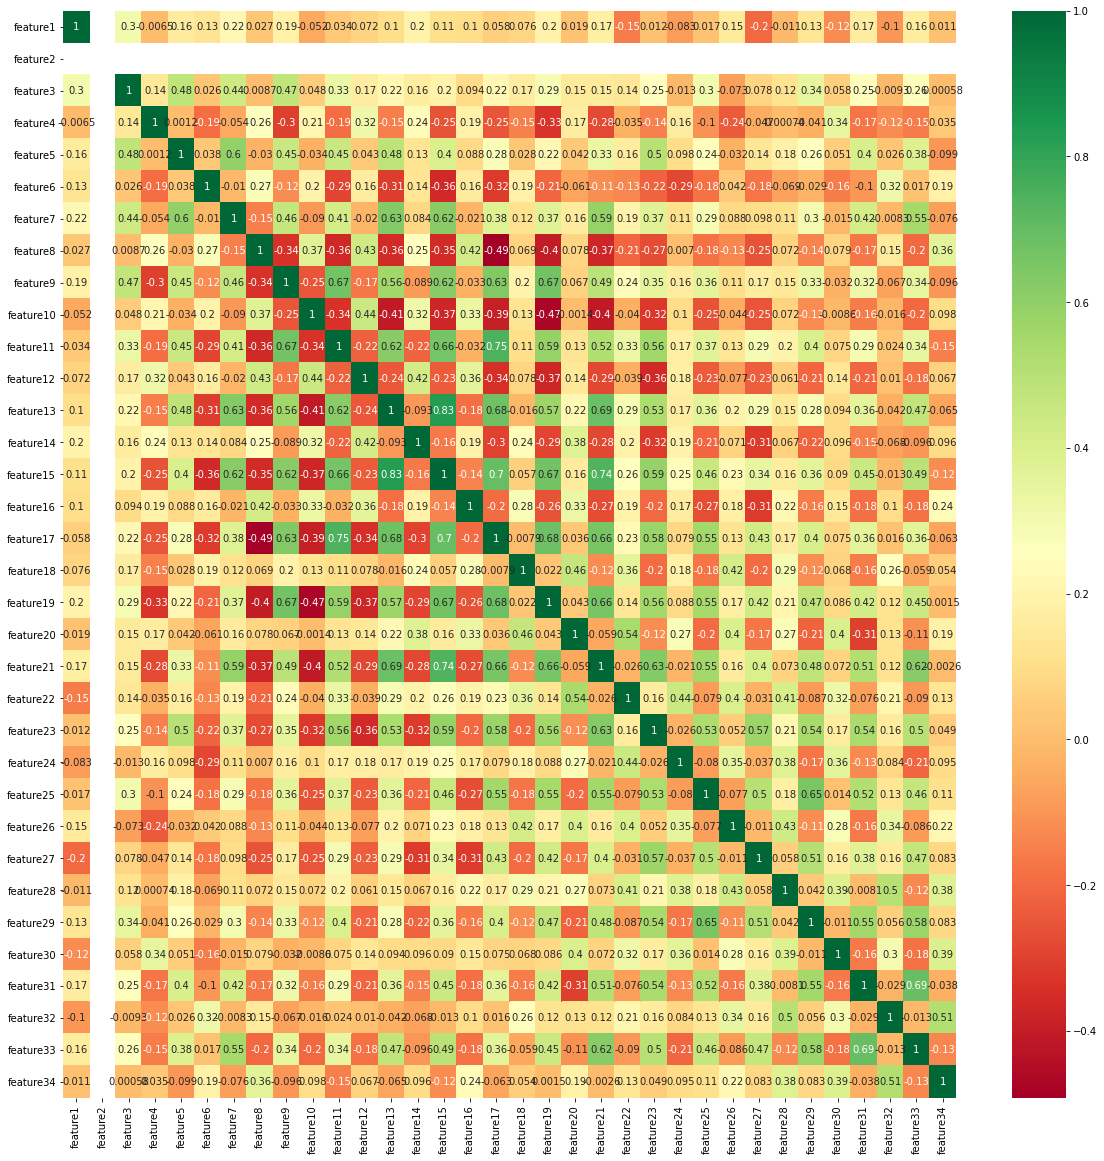

In [6]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
data.drop(columns=['feature2','feature23','feature31'],inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
data['label'] = LabelEncoder.fit_transform(data['label'])


In [9]:
data_x_input = data.loc[:, data.columns != 'label']
data_y_input = data.loc[:,data.columns == 'label']
from sklearn.model_selection import train_test_split

train_data,test_data,train_targets,test_targets =  train_test_split(data_x_input,data_y_input , test_size = 0.40 , random_state = 42)

In [10]:
mean = train_data.mean()
train_data -= mean
std = train_data.std()
train_data /=std

test_data -=mean
test_data /=std

In [17]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(train_data,
          train_targets, 
          epochs=40, 
          batch_size=1
          )

Epoch 1/40
210/210 [==============================] - 1s 992us/step - loss: 0.7047 - accuracy: 0.6566
Epoch 2/40
210/210 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8468
Epoch 3/40
210/210 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8169
Epoch 4/40
210/210 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.8995
Epoch 5/40
210/210 [==============================] - 0s 1ms/step - loss: 0.2746 - accuracy: 0.8838
Epoch 6/40
210/210 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.8991
Epoch 7/40
210/210 [==============================] - 0s 1ms/step - loss: 0.1810 - accuracy: 0.9083
Epoch 8/40
210/210 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9331
Epoch 9/40
210/210 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.9419
Epoch 10/40
210/210 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.93

In [18]:
results = model.evaluate(test_data, test_targets)

5/5 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.9220


In [19]:
results

[0.34058839082717896, 0.9219858050346375]

In [20]:
model.predict(test_data)

array([[9.50824142e-01],
       [9.99090433e-01],
       [9.99979138e-01],
       [8.45838785e-01],
       [9.98071432e-01],
       [9.88622785e-01],
       [9.33869243e-01],
       [9.99966741e-01],
       [9.99690771e-01],
       [9.99846220e-01],
       [4.87601865e-05],
       [4.37192684e-05],
       [1.15964116e-09],
       [9.87640858e-01],
       [9.99979377e-01],
       [9.97430325e-01],
       [9.99796510e-01],
       [1.06120865e-07],
       [9.98803139e-01],
       [4.81573534e-06],
       [9.91898954e-01],
       [2.54579220e-07],
       [4.91097397e-12],
       [9.73527312e-01],
       [9.99650300e-01],
       [9.99828637e-01],
       [3.54316831e-03],
       [8.74280930e-04],
       [4.02718782e-04],
       [9.98042107e-01],
       [9.87238050e-01],
       [9.99612749e-01],
       [9.98943090e-01],
       [9.99549747e-01],
       [9.99859750e-01],
       [5.93946133e-05],
       [9.93145168e-01],
       [9.99352038e-01],
       [7.30271220e-01],
       [9.99967217e-01],
